<a href="https://colab.research.google.com/github/khiljaekang/colab/blob/main/chessman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob
import pickle

In [25]:
import random 
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Dropout,Flatten,Activation,MaxPool2D,BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import SGD


In [4]:
CATAGORIES=['Bishop','King','Knight','Pawn','Queen','Rook'] ## define the list of number of classes we are going to use.
DATADIR='../input/chessman-image-dataset/Chessman-image-dataset/Chess' # dataset path 
IMG_SIZE=300

In [5]:
os.environ['KAGGLE_USERNAME'] = 'kangkhiljae'
os.environ['KAGGLE_KEY'] = '85e7d48d8e8f4f81887cbc85143a3a0f'


In [6]:
!rm *.*
!kaggle datasets download -d niteshfre/chessman-image-dataset
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
 94% 54.0M/57.6M [00:02<00:00, 13.9MB/s]
100% 57.6M/57.6M [00:02<00:00, 27.9MB/s]
Archive:  chessman-image-dataset.zip
  inflating: Chessman-image-dataset/Chess/Bishop/00000000.JPG  
  inflating: Chessman-image-dataset/Chess/Bishop/00000001.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000002.JPG  
  inflating: Chessman-image-dataset/Chess/Bishop/00000003.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000004.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000006.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000007.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000008.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000009.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000010.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000011.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000012.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000013.jpg 

In [63]:
CATAGORIES=['Bishop','King','Knight','Pawn','Queen','Rook'] ## define the list of number of classes we are going to use.
DATADIR='./Chessman-image-dataset/Chess' # dataset path 
IMG_SIZE=300  ## mention size of image you wanted

In [67]:
nb_class = len(CATAGORIES)
nb_class

6

In [9]:
|train_datagen = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.3,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   shear_range=3, 
                                    zoom_range=50,
                                    horizontal_flip=True,
                                   vertical_flip=True)

In [10]:
batch_size=32
IMG_HEIGHT=300
train_dir='./Chessman-image-dataset/Chess'
os.listdir(train_dir)

['Pawn', 'Rook', 'Queen', 'King', 'Bishop', 'Knight']

In [11]:
# X_train_datagen=train_datagen.flow_from_directory(batch_size=batch_size,
#                                                    directory=train_dir,
#                                                    shuffle=True,
#                                                    target_size=(IMG_HEIGHT, IMG_HEIGHT),
#                                                    subset='training',
#                                                    class_mode='categorical',
#                                                    color_mode='grayscale',
#                                                    seed=42)
                                                  
                                                  
# validation_generator = train_datagen.flow_from_directory(
#                                                         directory=train_dir,
#                                                         target_size=(IMG_HEIGHT, IMG_HEIGHT),
#                                                         color_mode='grayscale',
#                                                         batch_size=batch_size,
                                                        # class_mode='categorical',
#                                                         subset='validation',
#                                                         shuffle=True,
#                                                         seed=42)

Found 389 images belonging to 6 classes.
Found 162 images belonging to 6 classes.


In [19]:
# input_shape=(32, 300, 300, 1) ### here full size for model input  (batch_size,img_Size,img_size,1)

In [12]:
from tensorflow.keras.applications import EfficientNetB7

In [41]:
takemodel = EfficientNetB7(include_top=False, input_shape=(300, 300, 3))
takemodel.trainable=False
model = Sequential()
model.add(takemodel)
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
# optimizer = SGD(learning_rate=0.001)

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb7 (Functional)  (None, 10, 10, 2560)      64097687  
_________________________________________________________________
flatten_5 (Flatten)          (None, 256000)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 1536006   
Total params: 65,633,693
Trainable params: 1,536,006
Non-trainable params: 64,097,687
_________________________________________________________________


In [42]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [43]:
Early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)#to prevent overffiting of dataset

In [44]:
from keras.callbacks import ReduceLROnPlateau ##### To control learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0005) 
callback = [Early,learning_rate_reduction]


In [47]:
history = model.fit(X_train_datagen,
                              validation_data=validation_generator,
                              callbacks = callback, 
                              epochs=100,
                              verbose=0
                             )### fit dataset for just 10 epoch 
###we can fit for more epoch but our purpose just learning since we prefer 10 epoch may be you train for 50-200 epoch

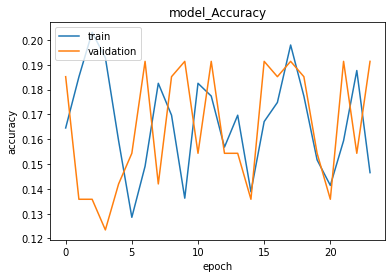

In [48]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')

In [49]:
##### just and image plotting function
def img_plot(x):
    ndarray=prepare(x)
    plt.plot(ndarray)
    plt.show()

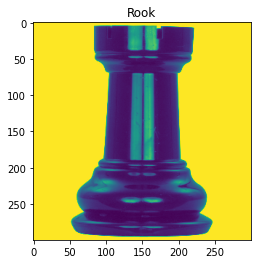

In [50]:
def prepare(file):
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_HEIGHT, IMG_HEIGHT))
    plt.imshow(new_array)
    return new_array.reshape(-1, IMG_HEIGHT, IMG_HEIGHT, 1)
#image = testX[1]#your image path
image='./Chessman-image-dataset/Chess/Rook/00000010.jpg'
prediction = model.predict([prepare(image)])
#img_plot(image)
prediction = list(prediction[0])
#print(CATAGORIES[prediction.index(max(prediction))])
temp=CATAGORIES[prediction.index(max(prediction))]
plt.title(temp)
plt.show()